<a href="https://colab.research.google.com/github/Soypete/Coding-Examples/blob/master/NLP_thoughtbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Natural Language Processing

Natural language processing is one of the biggest fields of Machine Learning. 

In [0]:
%%bash
pip3 install nltk
pip3 install sklearn

In [0]:
from google.colab import drive

train_path = '/content/gdrive/My Drive/ML/nlp/categorized.csv'

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# NLTK exploration
---

# Create Word Data Set

NLTK kas a large corpus of work data that we can download and use. the first step is to get data, explore the features, and determine use. 

In [0]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd


train_df = pd.read_csv(train_path)
train_df.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


In [0]:
train_df.dtypes

label              int64
comment           object
author            object
subreddit         object
score              int64
ups                int64
downs              int64
date              object
created_utc       object
parent_comment    object
dtype: object

## Clean the data

-1 means no up or down. it can be considered zero

In [0]:
for i, row in train_df.iterrows():
   if row['ups'] == -1 and row['downs'] == -1:
     row['ups'] = 0
     row['downs'] = 0
     train_df[i] = row

In [0]:
train_df.describe(include=[np.number])

this data shows the sarcasm score of the comment based on the parent comment. it is self annotated 

In [0]:
from nltk import tokenize
from nltk import FreqDist

list1 = train_df["comment"].astype('str').to_list()
list2 = train_df["parent_comment"].astype('str').to_list()
l_comments = list1 + list2

tokenizer =tokenize.MWETokenizer()

reddit_words = []
for sent in l_comments:
  words = sent.split()
  words = tokenizer.tokenize(sent.split())
  reddit_words += words

dist = FreqDist(reddit_words)


In [0]:
dist.most_common(10)

[('the', 1222003),
 ('to', 851445),
 ('a', 810030),
 ('and', 624479),
 ('I', 614249),
 ('of', 544684),
 ('is', 458502),
 ('in', 411440),
 ('that', 384687),
 ('you', 372136)]

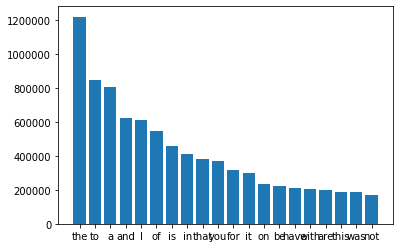

In [0]:
import matplotlib.pyplot as plt

word = []
count = []
for tuples in dist.most_common(20):
  word += [tuples[0]]
  count += [tuples[1]]

plt.bar(word, count)

plt.show()
